In [1]:
import os
import zipfile

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip \ -O /tmp/databasesLoadData.zip

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [3]:
# VSCode.Cell
!curl -L https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip -o databasesLoadData.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 68.3M    0 15146    0     0  15852      0  1:15:20 --:--:--  1:15:20 15876
  7 68.3M    7 5392k    0     0  2997k      0  0:00:23  0:00:01  0:00:22 2998k
 21 68.3M   21 14.4M    0     0  5288k      0  0:00:13  0:00:02  0:00:11 5291k
 34 68.3M   34 23.8M    0     0  6418k      0  0:00:10  0:00:03  0:00:07 6420k
 48 68.3M   48 33.3M    0     0  7116k      0  0:00:09  0:00:04  0:00:05 7117k
 61 68.3M   61 42.3M    0     0  7478k      0  0:00:09  0:00:05  0:00:04 8950k
 72 68.3M   72 49.4M    0     0  7447k      0  0:00:09  0:00:06  0:00:03 9046k
 85 68.3M   85 58.3M    0     0  7662k      0  0:00:09  0:00:07  0:00:02 8992k
 98 68.3M   98 67.2M    0     0  7826k      0  0:00:08  0:00:08 --:--:-- 8897k
100 68.3M  100 68.3M    0     0  7847k      0  0:00

In [6]:
local_zip = 'databasesLoadData.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('databasesLoadData')
zip_ref.close()

In [20]:
import json 
import codecs
import requests
import numpy as np
from PIL import Image
from io import BytesIO
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [4]:
url = "databasesLoadData/sign_mnist_json/data.json"

In [5]:
data_json = []
with codecs.open(url, 'r', 'utf-8') as js:
    for line in js:
        data_json.append(json.loads(line))
        
print(f"Numero de ejemplos en el dataset: {len(data_json)}")

Numero de ejemplos en el dataset: 9


In [6]:
images = []

for data in data_json:
    response = requests.get(data['content'])
    img = np.asarray(Image.open(BytesIO(response.content)))
    images.append([img, data['label']])

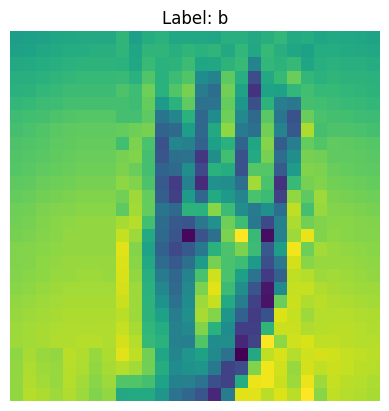

In [9]:
plt.imshow(images[0][0]) 
plt.title(f"Label: {images[0][1]}")
plt.axis('off')
plt.show()

# Doing the process but with base64

In [10]:
import base64

In [11]:
url = "databasesLoadData/sign_mnist_base64/data.json"

In [12]:
with open(url) as f:
    data = json.load(f)

In [13]:
print(data)

{'b': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AOhS246VBdyJbqyDmbaGVSOuWxTUk3XckDKcGVkjI/2VBOf1qcwc9K00i4rnNbCLrcSPMkQKJ97PUNnHHtmrllEf7US3dSJIEklcEdd7DBHtjP5VrGLmrSpxWHewQnxNHNOBsAJOfYZpvh8zXup394xPkKBAg9SDk/lx+db5j5pCcICO+K47X7+cL5uRv2kZxXW6TaRWek20UIIBQOSepZhkk/iasMxDV//Z'}


In [18]:
base64_img_bytes = data['b'].encode('utf-8')
path_imag = 'databasesLoadData/sign_mnist_base64/decoded_image.png'
with open(path_imag, "wb") as file_to_save:
    decoded_image_data = base64.decodebytes(base64_img_bytes)
    file_to_save.write(decoded_image_data)

In [19]:
img = Image.open(path_imag)
img